# MODELO DE PREVENCIÓN DE FRAUDE - SEGURO MASCOTAS

## IMPORTE DE LIBRERÍAS, CARGUE Y BREVE ANÁLISIS EXPLORATORIO

In [809]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from joblib import dump
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import BorderlineSMOTE

Cargamos el archivo xlsx...

In [810]:
df = pd.read_excel('fraude_2.xlsx')
df.head(10)

,FECHA_SUSCRIPCION,FECHA_SINIESTRO,KEY_ID_BENEFICIARIO,CODIGO_RIESGO,NUMERO_SINIESTRO,CODIGO_CAUSA,LIQUIDADO_BOLIVAR,CODIGO_CANAL,CODIGO_COBERTURA,MUNICIPIO_SINIESTRO,...,CLIENTE_BANCARIO,CLIENTE_DAVIPLATA,ACIERTA_PLUS,SALDO_TDC_MER,SALDO_ROT_MER,SALDO_CAB_MER,SALDO_HP_MER,SALDO_OTROS_COMER_MER,SALDO_VEH_MER,ANTIGUEDAD
0,2024-02-19,2024-08-30,C/xVAwEPssQqs6o2AvM1aMeFpKhdP9lVR/QU+hTaobuot/...,1,35510001103,992,1028067,50,228,NaN,...,1,0,807,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0
1,2023-07-12,2023-09-18,L2jxPBKTE08gJOFMdGcPOaDdbL2HHkAeFox4/Ho5cwNnFc...,1,35510000467,992,505700,50,228,NaN,...,1,1,864,2922.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
2,2023-07-12,2024-03-15,L2jxPBKTE08gJOFMdGcPOaDdbL2HHkAeFox4/Ho5cwNnFc...,1,35510000754,992,728000,50,228,NaN,...,1,1,864,2922.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
3,2022-05-28,2022-08-22,W9fcxP8EOI6SexBdn+T6owJ6SFvYZmwVAR8plM6ZO4RFcP...,1,35522300227,992,270474,50,228,NaN,...,1,1,857,4630.0,14636.0,-1.0,-1.0,-1.0,-1.0,0.0
4,2022-01-24,2022-08-20,oJSogERrUi8f9HhppB6kCl9cTrbBZAUBC0fhwyoVOND9oL...,1,51640000080,992,1500000,50,228,NaN,...,1,1,839,12255.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
5,2021-05-03,2022-04-28,t0UQ5hU/Ap684FzV47arBabH8G8c3VEm1XCkblEA/or3ch...,1,51462301130,992,71000,50,228,NaN,...,1,1,876,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
6,2024-04-01,2024-10-27,+5RxU3iVHBWVHiR4XHb9bO3Xl4516T7WzY0TMhZtjePse0...,2,52820000289,992,423346,50,228,NaN,...,0,1,690,17872.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
7,2023-09-01,2023-09-30,+5RxU3iVHBWVHiR4XHb9bO3Xl4516T7WzY0TMhZtjePse0...,2,52820000140,992,695000,50,228,NaN,...,0,1,747,15365.0,-1.0,9962.0,-1.0,-1.0,-1.0,0.0
8,2023-04-01,2023-04-18,+5RxU3iVHBWVHiR4XHb9bO3Xl4516T7WzY0TMhZtjePse0...,1,52820000092,992,490500,50,228,NaN,...,0,1,811,11452.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
9,2023-06-01,2024-05-15,+ReAdByh+ynKBZstI9XALajf3d5ACXBtw/we5OkJ5D3H6S...,1,51462302244,992,629000,50,228,NaN,...,0,1,861,380.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


In [811]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   FECHA_SUSCRIPCION       2779 non-null   datetime64[ns]
 1   FECHA_SINIESTRO         2779 non-null   datetime64[ns]
 2   KEY_ID_BENEFICIARIO     2779 non-null   object        
 3   CODIGO_RIESGO           2779 non-null   int64         
 4   NUMERO_SINIESTRO        2779 non-null   int64         
 5   CODIGO_CAUSA            2779 non-null   int64         
 6   LIQUIDADO_BOLIVAR       2779 non-null   int64         
 7   CODIGO_CANAL            2779 non-null   int64         
 8   CODIGO_COBERTURA        2779 non-null   int64         
 9   MUNICIPIO_SINIESTRO     0 non-null      float64       
 10  MARCA_REFERIDO          2779 non-null   object        
 11  EXPEDIENTE              2779 non-null   object        
 12  NUMERO_POLIZA           2779 non-null   int64   

In [812]:
df.describe()

,FECHA_SUSCRIPCION,FECHA_SINIESTRO,CODIGO_RIESGO,NUMERO_SINIESTRO,CODIGO_CAUSA,LIQUIDADO_BOLIVAR,CODIGO_CANAL,CODIGO_COBERTURA,MUNICIPIO_SINIESTRO,NUMERO_POLIZA,...,CLIENTE_BANCARIO,CLIENTE_DAVIPLATA,ACIERTA_PLUS,SALDO_TDC_MER,SALDO_ROT_MER,SALDO_CAB_MER,SALDO_HP_MER,SALDO_OTROS_COMER_MER,SALDO_VEH_MER,ANTIGUEDAD
count,2779,2779,2779.000000,2.779000e+03,2779.000000,2.779000e+03,2779.000000,2779.000000,0.0,2.779000e+03,...,2779.000000,2779.000000,2779.000000,2755.000000,2708.000000,2718.000000,2709.000000,2703.000000,2701.000000,2772.0
mean,2023-01-29 06:33:48.643396864,2023-07-03 20:47:14.400863488,1.051457,4.201723e+10,965.414178,4.775165e+05,45.926592,235.768262,NaN,4.201595e+12,...,0.873336,0.893847,733.021591,5425.788748,643.408789,10741.500736,11443.841639,2488.376619,2308.223621,0.0
min,2020-08-31 00:00:00,2021-06-11 00:00:00,1.000000,1.010230e+10,69.000000,-1.500000e+06,10.000000,228.000000,NaN,1.010000e+12,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
25%,2022-05-30 00:00:00,2022-10-31 12:00:00,1.000000,3.551000e+10,992.000000,1.927500e+05,50.000000,228.000000,NaN,3.551000e+12,...,1.000000,1.000000,724.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
50%,2023-03-15 00:00:00,2023-08-16 00:00:00,1.000000,5.146230e+10,992.000000,3.458500e+05,50.000000,228.000000,NaN,5.146000e+12,...,1.000000,1.000000,793.000000,265.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
75%,2023-11-10 00:00:00,2024-04-03 00:00:00,1.000000,5.146230e+10,992.000000,6.637500e+05,50.000000,228.000000,NaN,5.146000e+12,...,1.000000,1.000000,839.000000,4796.000000,-1.000000,2457.250000,-1.000000,-1.000000,-1.000000,0.0
max,2024-08-30 00:00:00,2024-11-18 00:00:00,3.000000,5.282000e+10,992.000000,4.909942e+06,50.000000,347.000000,NaN,5.282000e+12,...,1.000000,1.000000,927.000000,224589.000000,122541.000000,435936.000000,731293.000000,521829.000000,200759.000000,0.0
std,NaN,NaN,0.266731,1.304135e+10,147.386877,4.306639e+05,12.099435,28.626657,NaN,1.304124e+12,...,0.332656,0.308089,182.370888,13923.712584,4827.112375,31677.501302,51516.359737,27754.829389,13327.957553,0.0


Text(0.5, 1.0, 'Distribución del Ingreso')

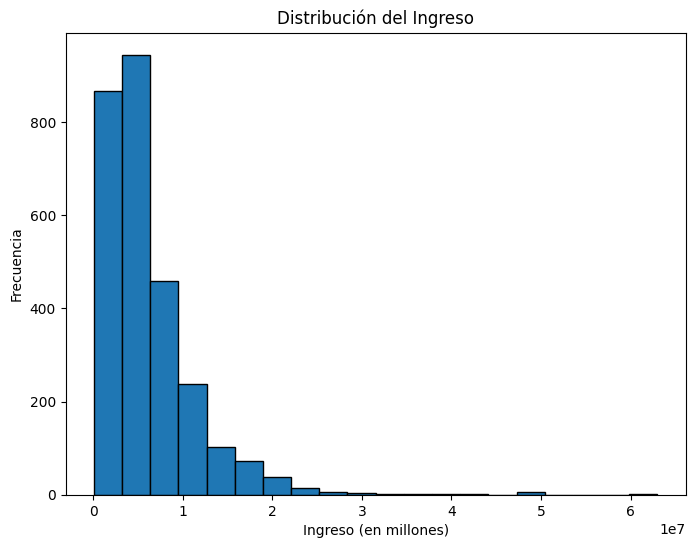

In [813]:
plt.figure(figsize=(8, 6))
plt.hist(df['INGRESO_2'], bins=20, edgecolor='black')
plt.xlabel('Ingreso (en millones)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ingreso')

Text(0.5, 1.0, 'Distribución de la Edad')

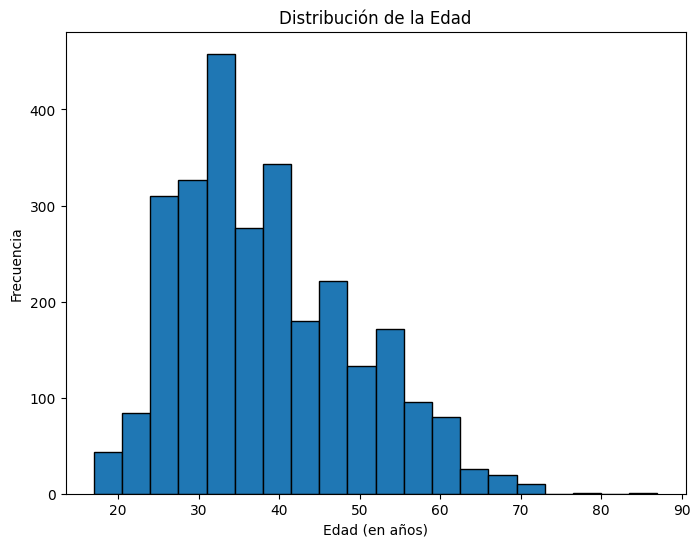

In [814]:
plt.figure(figsize=(8, 6))
plt.hist(df['EDAD'], bins=20, edgecolor='black')
plt.xlabel('Edad (en años)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')

Text(0.5, 1.0, 'Distribución del puntaje Crediticio')

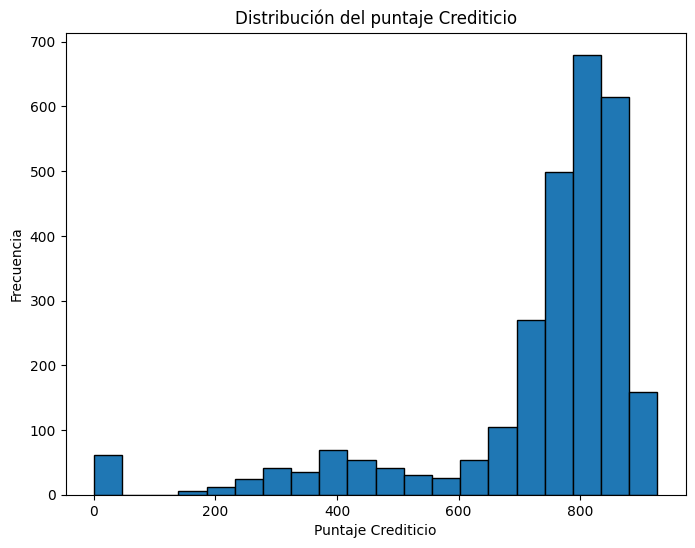

In [815]:
plt.figure(figsize=(8, 6))
plt.hist(df['ACIERTA_PLUS'], bins=20, edgecolor='black')
plt.xlabel('Puntaje Crediticio')
plt.ylabel('Frecuencia')
plt.title('Distribución del puntaje Crediticio')

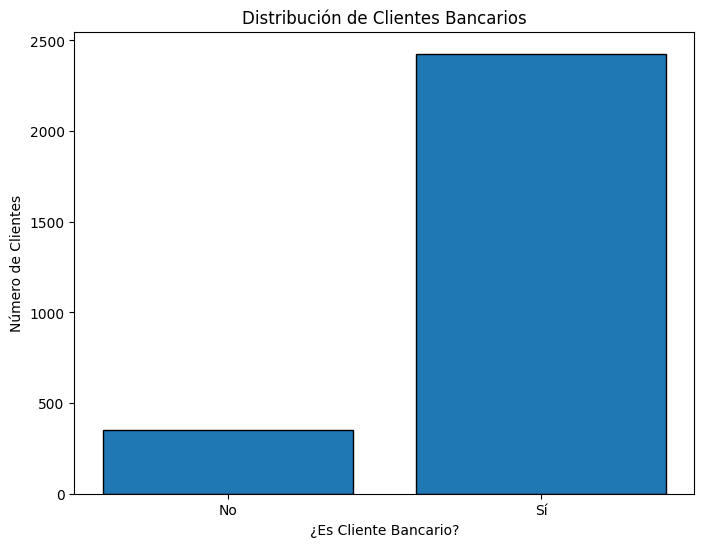

In [816]:
plt.figure(figsize=(8, 6))
plt.bar(df['CLIENTE_BANCARIO'].unique(), df['CLIENTE_BANCARIO'].value_counts(), edgecolor='black')
plt.xlabel('¿Es Cliente Bancario?')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes Bancarios')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

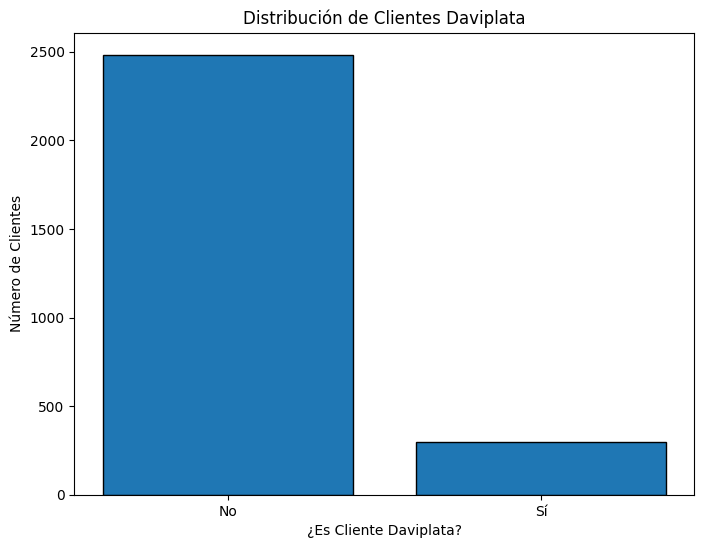

In [817]:
plt.figure(figsize=(8, 6))
plt.bar(df['CLIENTE_DAVIPLATA'].unique(), df['CLIENTE_DAVIPLATA'].value_counts(), edgecolor='black')
plt.xlabel('¿Es Cliente Daviplata?')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes Daviplata')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

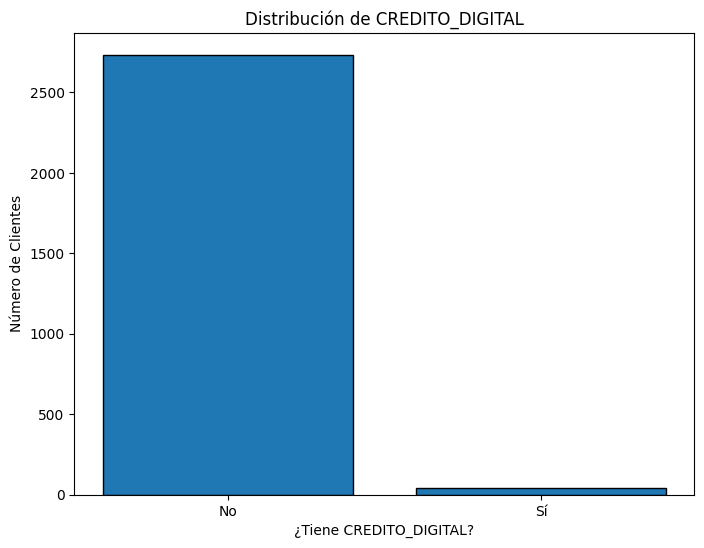

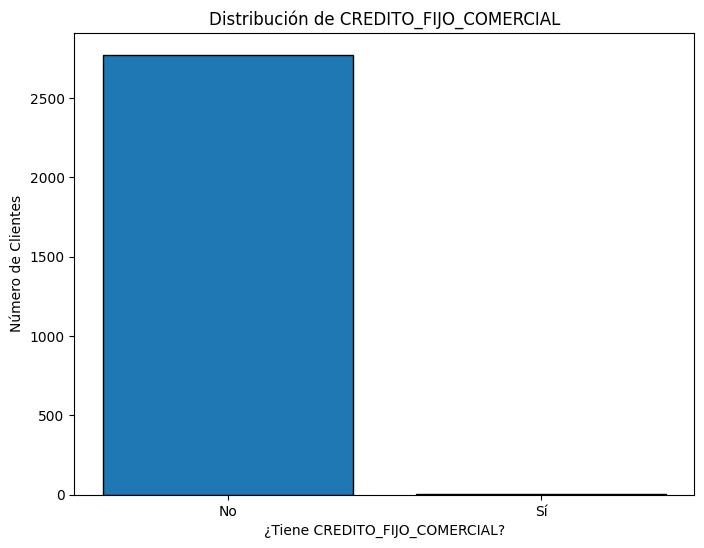

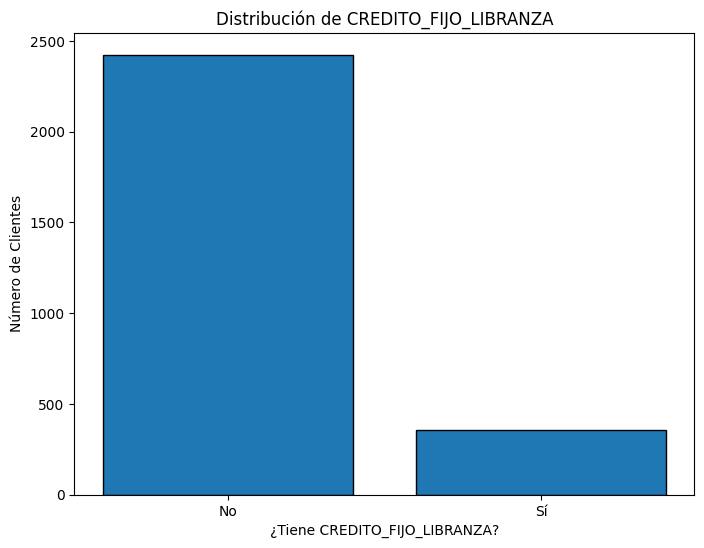

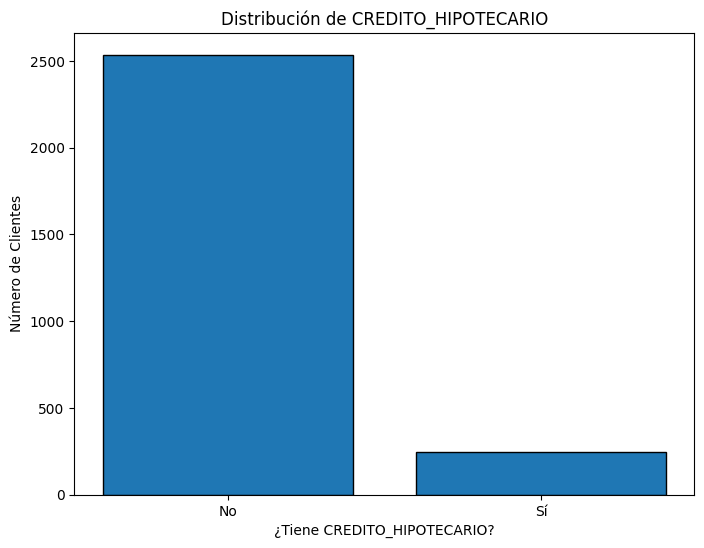

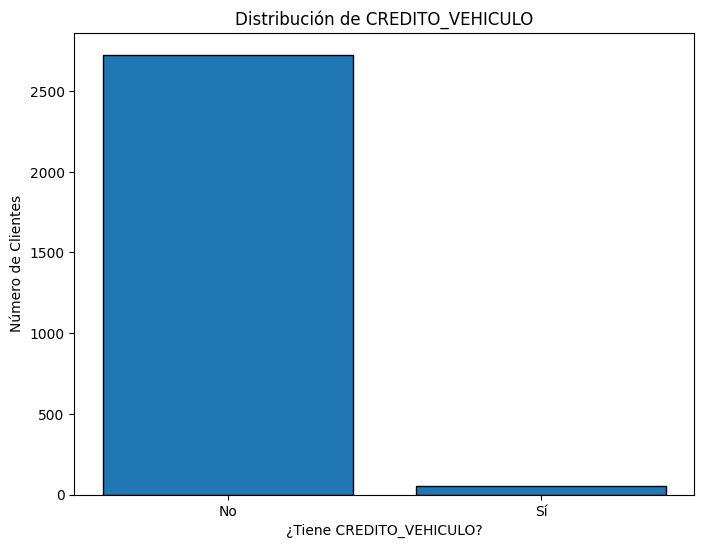

In [818]:
def graficar_distribucion_productos(df, lista_variables):
    """
    Genera gráficos de barras para cada variable en la lista, mostrando la distribución de los productos.

    Args:
        df: DataFrame con los datos.
        lista_variables: Lista de nombres de las variables a graficar.
    """

    for variable in lista_variables:
        plt.figure(figsize=(8, 6))
        plt.bar(df[variable].unique(), df[variable].value_counts(), edgecolor='black')
        plt.xlabel(f"¿Tiene {variable}?")
        plt.ylabel("Número de Clientes")
        plt.title(f"Distribución de {variable}")
        plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
        plt.show()

# Lista de variables a graficar
variables_a_graficar = ['CREDITO_DIGITAL', 'CREDITO_FIJO_COMERCIAL', 'CREDITO_FIJO_LIBRANZA',
                      'CREDITO_HIPOTECARIO', 'CREDITO_VEHICULO']

# Llamar a la función para generar los gráficos
graficar_distribucion_productos(df, variables_a_graficar)

## PROCESAMIENTO PARA MODELADO

Luego de entender un poco el comportamiento de nuestros datos pasamos a ajustar un poco nuestro dataframe...

In [819]:
df2 = df[['CREDITO_DIGITAL', 'CREDITO_FIJO_COMERCIAL', 'CREDITO_FIJO_LIBRANZA', 'CREDITO_HIPOTECARIO', 'CREDITO_VEHICULO', 'CDT', 'CUENTA_AHORROS', 'CUENTA_CORRIENTE','CLIENTE_BANCARIO', 'CLIENTE_DAVIPLATA', 'INGRESO_2', 'SEGMENTO_2', 'GENERO', 'EDAD', 'ACIERTA_PLUS', 'tipo_riesgo']]
print(df2.isnull().sum())

CREDITO_DIGITAL             0
CREDITO_FIJO_COMERCIAL      0
CREDITO_FIJO_LIBRANZA       0
CREDITO_HIPOTECARIO         0
CREDITO_VEHICULO            0
CDT                         0
CUENTA_AHORROS              0
CUENTA_CORRIENTE            0
CLIENTE_BANCARIO            0
CLIENTE_DAVIPLATA           0
INGRESO_2                  19
SEGMENTO_2                 37
GENERO                    198
EDAD                        0
ACIERTA_PLUS                0
tipo_riesgo                26
dtype: int64


In [820]:
print(f"Número de filas duplicadas: {df2.duplicated().sum()}")
df2 = df2.drop_duplicates()
print(f"Nuevo número de filas: {len(df2)}")

Número de filas duplicadas: 525
Nuevo número de filas: 2254


In [821]:
df2['tipo_riesgo'].value_counts()

tipo_riesgo
Bajo    1968
Alto     262
Name: count, dtype: int64

In [822]:
df2 = df2.dropna()
df2['tipo_riesgo'].value_counts()

tipo_riesgo
Bajo    1799
Alto     237
Name: count, dtype: int64

In [823]:
df2.describe()

,CREDITO_DIGITAL,CREDITO_FIJO_COMERCIAL,CREDITO_FIJO_LIBRANZA,CREDITO_HIPOTECARIO,CREDITO_VEHICULO,CDT,CUENTA_AHORROS,CUENTA_CORRIENTE,CLIENTE_BANCARIO,CLIENTE_DAVIPLATA,INGRESO_2,SEGMENTO_2,EDAD,ACIERTA_PLUS
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2.036000e+03,2036.000000,2036.000000,2036.000000
mean,0.017191,0.002456,0.140472,0.094303,0.021120,0.078585,0.864931,0.135069,0.936640,0.880157,6.337855e+06,4.200393,38.844794,738.078585
std,0.130013,0.049507,0.347561,0.292321,0.143819,0.269157,0.341881,0.341881,0.243668,0.324857,5.477270e+06,0.771813,10.769895,171.256254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.625200e+04,2.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.886711e+06,4.000000,30.000000,724.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.734220e+06,4.000000,37.000000,793.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,7.815993e+06,5.000000,47.000000,839.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.299335e+07,6.000000,87.000000,927.000000


In [824]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2036 entries, 0 to 2778
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CREDITO_DIGITAL         2036 non-null   int64  
 1   CREDITO_FIJO_COMERCIAL  2036 non-null   int64  
 2   CREDITO_FIJO_LIBRANZA   2036 non-null   int64  
 3   CREDITO_HIPOTECARIO     2036 non-null   int64  
 4   CREDITO_VEHICULO        2036 non-null   int64  
 5   CDT                     2036 non-null   int64  
 6   CUENTA_AHORROS          2036 non-null   int64  
 7   CUENTA_CORRIENTE        2036 non-null   int64  
 8   CLIENTE_BANCARIO        2036 non-null   int64  
 9   CLIENTE_DAVIPLATA       2036 non-null   int64  
 10  INGRESO_2               2036 non-null   float64
 11  SEGMENTO_2              2036 non-null   float64
 12  GENERO                  2036 non-null   object 
 13  EDAD                    2036 non-null   int64  
 14  ACIERTA_PLUS            2036 non-null   int64

In [825]:
for col in df2.columns:
  print(f"{col}: {df2[col].unique()[:10]}")

CREDITO_DIGITAL: [0 1]
CREDITO_FIJO_COMERCIAL: [0 1]
CREDITO_FIJO_LIBRANZA: [0 1]
CREDITO_HIPOTECARIO: [0 1]
CREDITO_VEHICULO: [0 1]
CDT: [0 1]
CUENTA_AHORROS: [1 0]
CUENTA_CORRIENTE: [0 1]
CLIENTE_BANCARIO: [1 0]
CLIENTE_DAVIPLATA: [0 1]
INGRESO_2: [ 5861835.  7810800. 13598720. 12603360.  2200033.  3705964.  4991759.
  4571816.  9875081.  6933223.]
SEGMENTO_2: [4. 5. 3. 2. 6.]
GENERO: ['FEMENINO' 'MASCULINO']
EDAD: [71 52 53 60 58 44 33 61 50 26]
ACIERTA_PLUS: [807 864 857 839 876 690 747 811 861 879]
tipo_riesgo: ['Bajo' 'Alto']


In [826]:
# Reemplazar valores en la columna 'tipo_riesgo'
df2['tipo_riesgo'] = df2['tipo_riesgo'].replace({'Bajo': 0, 'Alto': 1})

# Verificar los cambios
print(df2[['tipo_riesgo']].head())

   tipo_riesgo
0            0
1            0
3            0
4            0
5            0


In [827]:
# Reemplazar valores en la columna 'tipo_riesgo'
df2['GENERO'] = df2['GENERO'].replace({'FEMENINO': 0, 'MASCULINO': 1})

# Verificar los cambios
print(df2[['GENERO']].head())

   GENERO
0       0
1       0
3       0
4       1
5       0


In [828]:
df2 = pd.get_dummies(df2, columns=['SEGMENTO_2'], drop_first=True)
# Asegurarse de que los valores sean convertidos correctamente a 0 y 1
df2['SEGMENTO_2_3.0'] = df2['SEGMENTO_2_3.0'].astype(int)
df2['SEGMENTO_2_4.0'] = df2['SEGMENTO_2_4.0'].astype(int)
df2['SEGMENTO_2_5.0'] = df2['SEGMENTO_2_5.0'].astype(int)
df2['SEGMENTO_2_6.0'] = df2['SEGMENTO_2_6.0'].astype(int)
# Mostrar los primeros registros
df2.head()

,CREDITO_DIGITAL,CREDITO_FIJO_COMERCIAL,CREDITO_FIJO_LIBRANZA,CREDITO_HIPOTECARIO,CREDITO_VEHICULO,CDT,CUENTA_AHORROS,CUENTA_CORRIENTE,CLIENTE_BANCARIO,CLIENTE_DAVIPLATA,INGRESO_2,GENERO,EDAD,ACIERTA_PLUS,tipo_riesgo,SEGMENTO_2_3.0,SEGMENTO_2_4.0,SEGMENTO_2_5.0,SEGMENTO_2_6.0
0,0,0,0,0,0,0,1,0,1,0,5861835.0,0,71,807,0,0,1,0,0
1,0,0,0,0,0,1,1,0,1,1,7810800.0,0,52,864,0,0,1,0,0
3,0,0,1,0,0,0,1,1,1,1,13598720.0,0,53,857,0,0,0,1,0
4,1,0,0,0,0,0,1,1,1,1,12603360.0,1,60,839,0,0,0,1,0
5,0,0,0,0,0,0,1,0,1,1,2200033.0,0,58,876,0,0,1,0,0


In [829]:
for col in df2.columns:
  print(f"{col}: {df2[col].unique()[:10]}")

CREDITO_DIGITAL: [0 1]
CREDITO_FIJO_COMERCIAL: [0 1]
CREDITO_FIJO_LIBRANZA: [0 1]
CREDITO_HIPOTECARIO: [0 1]
CREDITO_VEHICULO: [0 1]
CDT: [0 1]
CUENTA_AHORROS: [1 0]
CUENTA_CORRIENTE: [0 1]
CLIENTE_BANCARIO: [1 0]
CLIENTE_DAVIPLATA: [0 1]
INGRESO_2: [ 5861835.  7810800. 13598720. 12603360.  2200033.  3705964.  4991759.
  4571816.  9875081.  6933223.]
GENERO: [0 1]
EDAD: [71 52 53 60 58 44 33 61 50 26]
ACIERTA_PLUS: [807 864 857 839 876 690 747 811 861 879]
tipo_riesgo: [0 1]
SEGMENTO_2_3.0: [0 1]
SEGMENTO_2_4.0: [1 0]
SEGMENTO_2_5.0: [0 1]
SEGMENTO_2_6.0: [0 1]


## ENTRENAMIENTO DE LOS MODELOS - BALANCEO CON ADASYN

Es bastante claro que nuestro df está desbalanceado por ende vamos a aplicar técnicas de sobremuestreo para ajustar nuestra clase minoritaria; en este caso los registros de fraude...

In [830]:
df2 = df2[[ 'CDT', 'CREDITO_FIJO_LIBRANZA', 'GENERO', 'SEGMENTO_2_4.0','CUENTA_CORRIENTE', 'tipo_riesgo']] 
#df2 = df2[[ 'CDT', 'CREDITO_FIJO_LIBRANZA','CUENTA_CORRIENTE', 'tipo_riesgo']] ## Un resultado favorable con random forest

In [831]:
# Configuración para reproducibilidad
RANDOM_STATE = 123

# =======================
# Preprocesamiento
# =======================

X = df2.drop('tipo_riesgo', axis=1)
y = df2['tipo_riesgo']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Aplicar ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=RANDOM_STATE)
X_train_s, y_train_s = adasyn.fit_resample(X_train, y_train)

In [832]:
# Escalar los datos
scaler = StandardScaler()
X_train_s_scaled = scaler.fit_transform(X_train_s)
X_test_scaled = scaler.transform(X_test)

# Verificar distribución de clases
print("Antes de ADASYN:", Counter(y_train))
print("Después de ADASYN:", Counter(y_train_s))

Antes de ADASYN: Counter({0: 1438, 1: 190})
Después de ADASYN: Counter({0: 1438, 1: 1408})


In [833]:
# =======================
# Ajuste de Random Forest
# =======================
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=RANDOM_STATE),
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_random.fit(X_train_s, y_train_s)
rf_best_model = rf_random.best_estimator_
print("Mejores parámetros para Random Forest:", rf_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Mejores parámetros para Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}


In [834]:
# =======================
# Ajuste de XGBoost
# =======================
xgb_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

xgb_random.fit(X_train_s, y_train_s)
xgb_best_model = xgb_random.best_estimator_
print("Mejores parámetros para XGBoost:", xgb_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros para XGBoost: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}


In [835]:
# =======================
# Ajuste de Regresión Logística
# =======================
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs','liblinear']
}

log_reg_random = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=RANDOM_STATE),
    param_distributions=log_reg_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

log_reg_random.fit(X_train_s_scaled, y_train_s)
log_reg_best_model = log_reg_random.best_estimator_
print("Mejores parámetros para Regresión Logística:", log_reg_random.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\57320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros para Regresión Logística: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}


Ahora evaluamos...

In [836]:
# Random Forest
y_prob_rf_test = rf_best_model.predict_proba(X_test)[:, 1]
y_prob_rf_train = rf_best_model.predict_proba(X_train_s)[:, 1]

auc_rf_test = roc_auc_score(y_test, y_prob_rf_test)
auc_rf_train = roc_auc_score(y_train_s, y_prob_rf_train)


print("Random Forest - AUC en entrenamiento:", auc_rf_train)
print("\n--- Clasificación en Entrenamiento ---")
print(classification_report(y_train_s, rf_best_model.predict(X_train_s)))

print("\nRandom Forest - AUC en prueba:", auc_rf_test)
print("\n--- Clasificación en Prueba ---")
print(classification_report(y_test, rf_best_model.predict(X_test)))


Random Forest - AUC en entrenamiento: 0.5856181940668859

--- Clasificación en Entrenamiento ---
              precision    recall  f1-score   support

           0       0.66      0.26      0.37      1438
           1       0.53      0.87      0.66      1408

    accuracy                           0.56      2846
   macro avg       0.60      0.56      0.51      2846
weighted avg       0.60      0.56      0.51      2846


Random Forest - AUC en prueba: 0.5234278304944893

--- Clasificación en Prueba ---
              precision    recall  f1-score   support

           0       0.90      0.23      0.36       361
           1       0.12      0.81      0.21        47

    accuracy                           0.29       408
   macro avg       0.51      0.52      0.29       408
weighted avg       0.81      0.29      0.35       408




--- Importancia de las variables ---
                 Feature  Importance
3         SEGMENTO_2_4.0    0.238992
0                    CDT    0.226080
4       CUENTA_CORRIENTE    0.203067
1  CREDITO_FIJO_LIBRANZA    0.195120
2                 GENERO    0.136742


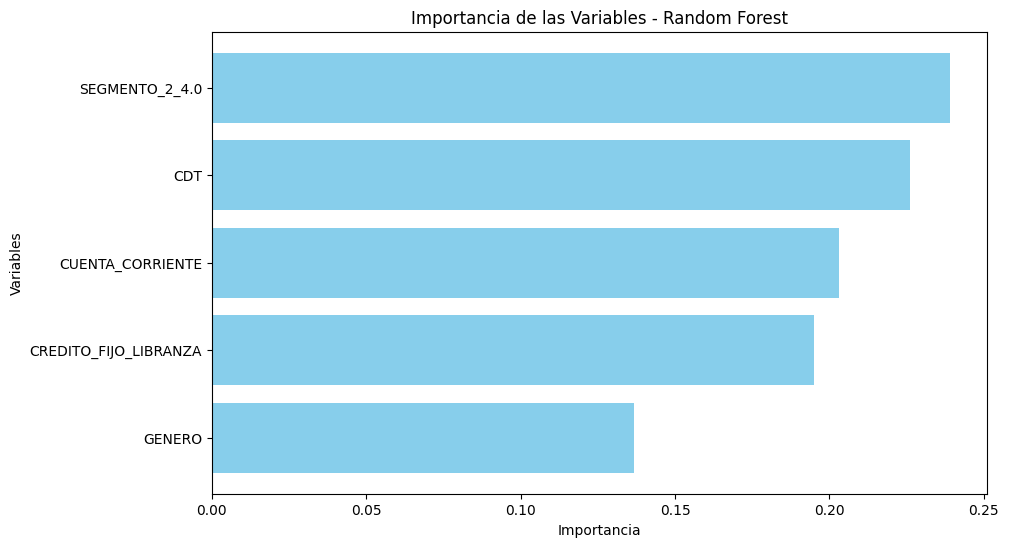

In [837]:
# Importancia de las variables
feature_importances = rf_best_model.feature_importances_
features = X_train_s.columns  # Asegúrate de que tus datos tengan nombres de columnas
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame de importancia
print("\n--- Importancia de las variables ---")
print(importance_df)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables - Random Forest')
plt.gca().invert_yaxis()  # Para que la variable más importante esté arriba
plt.show()

In [838]:
# XGBoost
y_prob_xgb_test = xgb_best_model.predict_proba(X_test)[:, 1]
y_prob_xgb_train = xgb_best_model.predict_proba(X_train_s)[:, 1]

auc_xgb_test = roc_auc_score(y_test, y_prob_xgb_test)
auc_xgb_train = roc_auc_score(y_train_s, y_prob_xgb_train)


print("XGBoost - AUC en entrenamiento:", auc_xgb_train)
print("\n--- Clasificación en Entrenamiento ---")
print(classification_report(y_train_s, xgb_best_model.predict(X_train_s)))

print("\nXGBoost - AUC en prueba:", auc_xgb_test)
print("\n--- Clasificación en Prueba ---")
print(classification_report(y_test, xgb_best_model.predict(X_test)))

XGBoost - AUC en entrenamiento: 0.5814052325673282

--- Clasificación en Entrenamiento ---
              precision    recall  f1-score   support

           0       0.64      0.28      0.39      1438
           1       0.53      0.84      0.65      1408

    accuracy                           0.56      2846
   macro avg       0.58      0.56      0.52      2846
weighted avg       0.59      0.56      0.52      2846


XGBoost - AUC en prueba: 0.5533093652384038

--- Clasificación en Prueba ---
              precision    recall  f1-score   support

           0       0.91      0.28      0.42       361
           1       0.12      0.79      0.21        47

    accuracy                           0.34       408
   macro avg       0.52      0.53      0.32       408
weighted avg       0.82      0.34      0.40       408




--- Importancia de las variables (XGBoost) ---
                 Feature  Importance
3         SEGMENTO_2_4.0       612.0
2                 GENERO       589.0
4       CUENTA_CORRIENTE       529.0
1  CREDITO_FIJO_LIBRANZA       466.0
0                    CDT       399.0


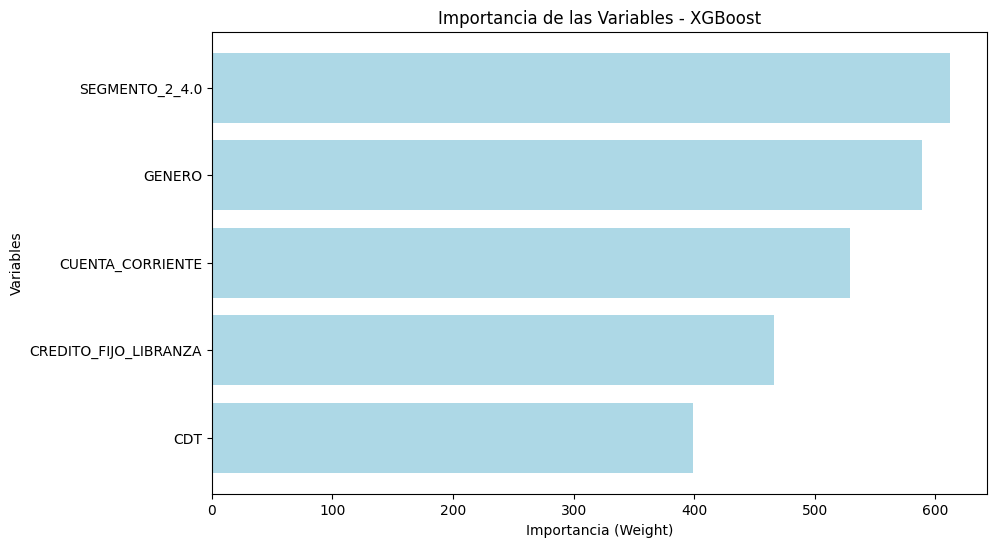

In [839]:
# Importancia de las variables
feature_importances = xgb_best_model.get_booster().get_score(importance_type='weight')
features = X_train_s.columns if isinstance(X_train_s, pd.DataFrame) else [f'Feature_{i}' for i in range(X_train_s.shape[1])]

# Crear un DataFrame de importancia
importance_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['Importance']).reset_index()
importance_df.columns = ['Feature', 'Importance']

# Si las características originales están disponibles, reemplace los nombres
importance_df['Feature'] = importance_df['Feature'].map(lambda x: features[int(x[1:])] if x[1:].isdigit() else x)

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame de importancia
print("\n--- Importancia de las variables (XGBoost) ---")
print(importance_df)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.xlabel('Importancia (Weight)')
plt.ylabel('Variables')
plt.title('Importancia de las Variables - XGBoost')
plt.gca().invert_yaxis()  # Para que la variable más importante esté arriba
plt.show()

In [840]:
# Regresión Logística
y_prob_log_test = log_reg_best_model.predict_proba(X_test_scaled)[:, 1]
y_prob_log_train = log_reg_best_model.predict_proba(X_train_s_scaled)[:, 1]

auc_log_test = roc_auc_score(y_test, y_prob_log_test)
auc_log_train = roc_auc_score(y_train_s, y_prob_log_train)


print("Regresión Logística - AUC en entrenamiento:", auc_log_train)
print("\n--- Clasificación en Entrenamiento ---")
print(classification_report(y_train_s, log_reg_best_model.predict(X_train_s_scaled)))

print("\nRegresión Logística - AUC en prueba:", auc_log_test)
print("\n--- Clasificación en Prueba ---")
print(classification_report(y_test, log_reg_best_model.predict(X_test_scaled)))


Regresión Logística - AUC en entrenamiento: 0.5604713083986598

--- Clasificación en Entrenamiento ---
              precision    recall  f1-score   support

           0       0.59      0.32      0.42      1438
           1       0.53      0.77      0.63      1408

    accuracy                           0.54      2846
   macro avg       0.56      0.55      0.52      2846
weighted avg       0.56      0.54      0.52      2846


Regresión Logística - AUC en prueba: 0.5762951611952614

--- Clasificación en Prueba ---
              precision    recall  f1-score   support

           0       0.92      0.32      0.48       361
           1       0.13      0.79      0.23        47

    accuracy                           0.38       408
   macro avg       0.53      0.56      0.35       408
weighted avg       0.83      0.38      0.45       408




--- Importancia de las variables (Regresión Logística) ---
                 Feature  Coefficient
0                    CDT    -0.165583
1  CREDITO_FIJO_LIBRANZA    -0.128099
4       CUENTA_CORRIENTE    -0.090051
2                 GENERO     0.010844
3         SEGMENTO_2_4.0    -0.001987


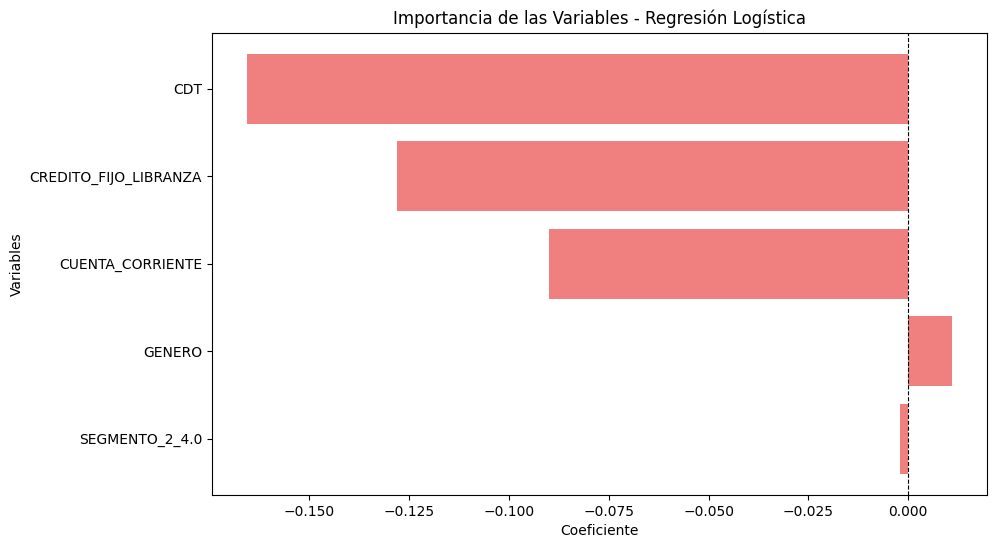

In [841]:
features = X_train_s.columns if isinstance(X_train_s, pd.DataFrame) else [f'Feature_{i}' for i in range(X_train_s.shape[1])]

# Importancia de las variables (coeficientes del modelo)
coefficients = log_reg_best_model.coef_[0]  # Coeficientes del modelo

importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)  # Ordenar por valor absoluto de coeficientes

# Mostrar el DataFrame de importancia
print("\n--- Importancia de las variables (Regresión Logística) ---")
print(importance_df)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='lightcoral')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea vertical en 0
plt.xlabel('Coeficiente')
plt.ylabel('Variables')
plt.title('Importancia de las Variables - Regresión Logística')
plt.gca().invert_yaxis()  # Para que la variable más importante esté arriba
plt.show()

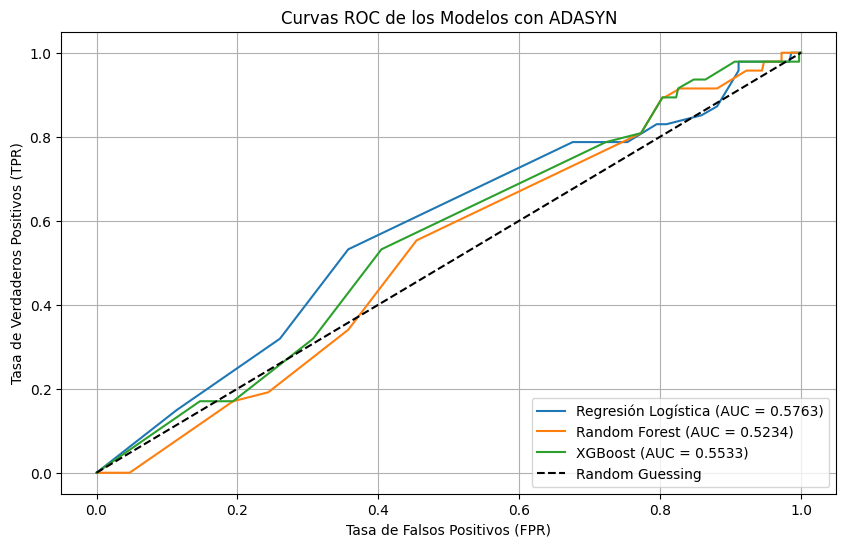

In [842]:
# Calcular la curva ROC y AUC para cada modelo
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log_test)


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf_test)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb_test)


# Gráfica de las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log_test:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf_test:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb_test :.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('Curvas ROC de los Modelos con ADASYN')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

c:\Users\57320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Matriz de Confusión Regresión:
[[361   0]
 [ 47   0]]


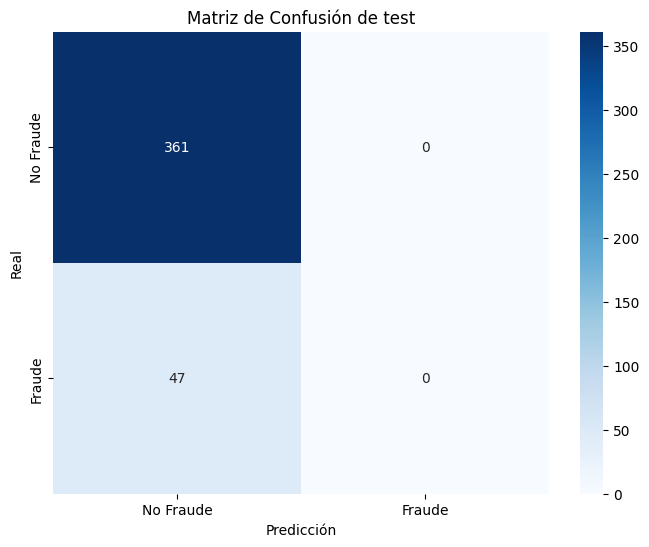

In [843]:
# Generar predicciones
#Regresión
y_pred_test_reg = log_reg_best_model.predict(X_test)

# Generar la matriz de confusión para el conjunto de test
matriz_confusion_test = confusion_matrix(y_test, y_pred_test_reg)
print("Matriz de Confusión Regresión:")
print(matriz_confusion_test)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de test')
plt.show()

Matriz de Confusión Random Forest:
[[ 82 279]
 [  9  38]]


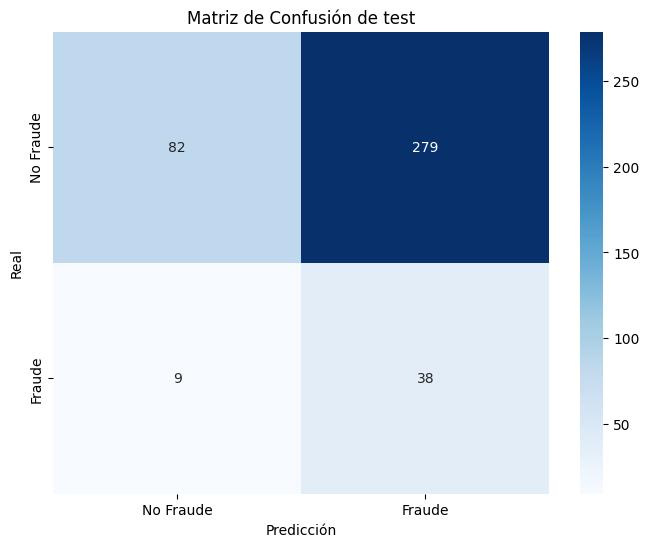

In [844]:
#RF
y_pred_test_rf = rf_best_model.predict(X_test)

matriz_confusion_test = confusion_matrix(y_test, y_pred_test_rf)
print("Matriz de Confusión Random Forest:")
print(matriz_confusion_test)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de test')
plt.show()


Matriz de Confusión XGBoost:
[[100 261]
 [ 10  37]]


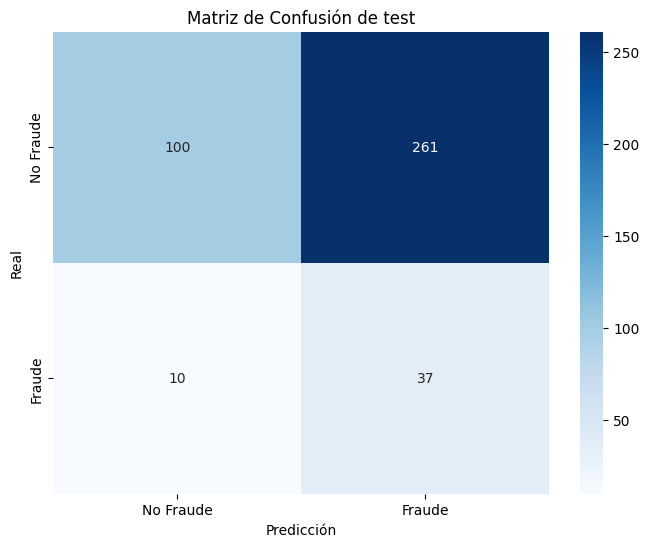

In [845]:
#XG
y_pred_test_xgb = xgb_best_model.predict(X_test)

matriz_confusion_test = confusion_matrix(y_test, y_pred_test_xgb)
print("Matriz de Confusión XGBoost:")
print(matriz_confusion_test)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de test')
plt.show()

## ENTRENAMIENTO DE LOS MODELOS - BALANCEO CON BorderlineSMOTE

Es claro que a nuestros modelos anteriores les cuesta predecir la clase minoritaria, por ende probaremos con otra técnica de balanceo...

In [846]:
#df2 = df2[['EDAD', 'SEGMENTO_2_5.0', 'ACIERTA_PLUS', 'CDT', 'CUENTA_CORRIENTE', 'CLIENTE_DAVIPLATA', 'CREDITO_FIJO_LIBRANZA', 'GENERO', 'tipo_riesgo']]

In [847]:
# Configuración para reproducibilidad
RANDOM_STATE = 123

# =======================
# Preprocesamiento
# =======================

X = df2.drop('tipo_riesgo', axis=1)
y = df2['tipo_riesgo']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Aplicar BorderlineSMOTE
bsmote = BorderlineSMOTE(sampling_strategy='minority', random_state=42)
X_train_s, y_train_s = bsmote.fit_resample(X_train, y_train)

In [848]:
# Escalar los datos
scaler = StandardScaler()
X_train_s_scaled = scaler.fit_transform(X_train_s)
X_test_scaled = scaler.transform(X_test)

# Verificar distribución de clases
print("Antes de Borderline:", Counter(y_train))
print("Después de Borderline:", Counter(y_train_s))

Antes de Borderline: Counter({0: 1438, 1: 190})
Después de Borderline: Counter({0: 1438, 1: 1438})


In [849]:
# =======================
# Ajuste de Random Forest
# =======================
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=RANDOM_STATE),
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_random.fit(X_train_s, y_train_s)
rf_best_model = rf_random.best_estimator_
print("Mejores parámetros para Random Forest:", rf_random.best_params_)

# =======================
# Ajuste de XGBoost
# =======================
xgb_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

xgb_random.fit(X_train_s, y_train_s)
xgb_best_model = xgb_random.best_estimator_
print("Mejores parámetros para XGBoost:", xgb_random.best_params_)

# =======================
# Ajuste de Regresión Logística
# =======================
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

log_reg_random = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=RANDOM_STATE),
    param_distributions=log_reg_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

log_reg_random.fit(X_train_s_scaled, y_train_s)
log_reg_best_model = log_reg_random.best_estimator_
print("Mejores parámetros para Regresión Logística:", log_reg_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros para Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros para XGBoost: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\57320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros para Regresión Logística: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}


In [850]:
# Random Forest
y_prob_rf_test = rf_best_model.predict_proba(X_test)[:, 1]
y_prob_rf_train = rf_best_model.predict_proba(X_train_s)[:, 1]

auc_rf_test = roc_auc_score(y_test, y_prob_rf_test)
auc_rf_train = roc_auc_score(y_train_s, y_prob_rf_train)


print("Random Forest - AUC en entrenamiento:", auc_rf_train)
print("\n--- Clasificación en Entrenamiento ---")
print(classification_report(y_train_s, rf_best_model.predict(X_train_s)))

print("\nRandom Forest - AUC en prueba:", auc_rf_test)
print("\n--- Clasificación en Prueba ---")
print(classification_report(y_test, rf_best_model.predict(X_test)))

Random Forest - AUC en entrenamiento: 0.6599151096504379

--- Clasificación en Entrenamiento ---
              precision    recall  f1-score   support

           0       0.74      0.39      0.51      1438
           1       0.58      0.87      0.70      1438

    accuracy                           0.63      2876
   macro avg       0.66      0.63      0.60      2876
weighted avg       0.66      0.63      0.60      2876


Random Forest - AUC en prueba: 0.47221076206754287

--- Clasificación en Prueba ---
              precision    recall  f1-score   support

           0       0.85      0.30      0.45       361
           1       0.10      0.60      0.17        47

    accuracy                           0.34       408
   macro avg       0.48      0.45      0.31       408
weighted avg       0.77      0.34      0.42       408




--- Importancia de las variables ---
                 Feature  Importance
3         SEGMENTO_2_4.0    0.301441
4       CUENTA_CORRIENTE    0.218582
2                 GENERO    0.207321
0                    CDT    0.156884
1  CREDITO_FIJO_LIBRANZA    0.115771


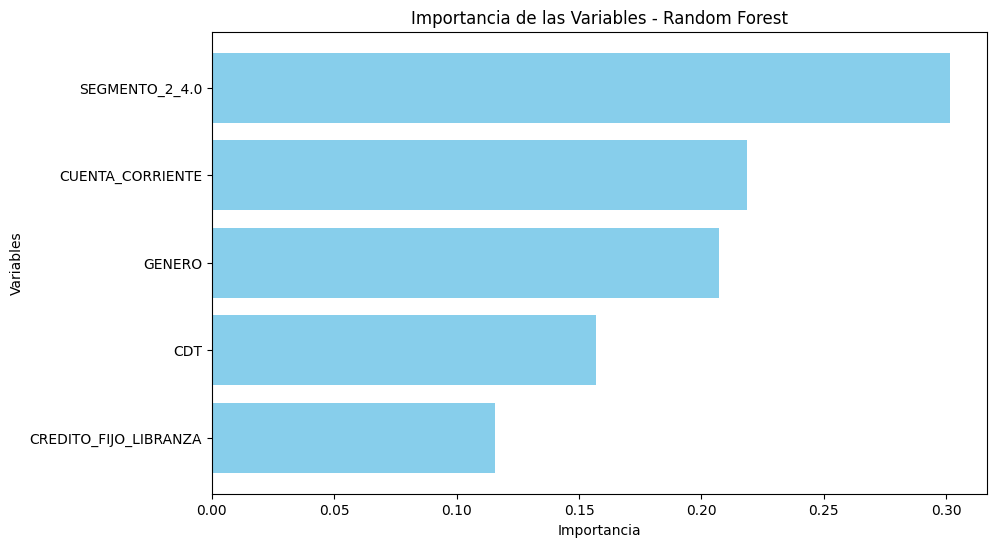

In [851]:
# Importancia de las variables
feature_importances = rf_best_model.feature_importances_
features = X_train_s.columns  # Asegúrate de que tus datos tengan nombres de columnas
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame de importancia
print("\n--- Importancia de las variables ---")
print(importance_df)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables - Random Forest')
plt.gca().invert_yaxis()  # Para que la variable más importante esté arriba
plt.show()

In [852]:
# Regresión Logística
y_prob_log_test = log_reg_best_model.predict_proba(X_test_scaled)[:, 1]
y_prob_log_train = log_reg_best_model.predict_proba(X_train_s_scaled)[:, 1]

auc_log_test = roc_auc_score(y_test, y_prob_log_test)
auc_log_train = roc_auc_score(y_train_s, y_prob_log_train)


print("Regresión Logística - AUC en entrenamiento:", auc_log_train)
print("\n--- Clasificación en Entrenamiento ---")
print(classification_report(y_train_s, log_reg_best_model.predict(X_train_s_scaled)))

print("\nRegresión Logística - AUC en prueba:", auc_log_test)
print("\n--- Clasificación en Prueba ---")
print(classification_report(y_test, log_reg_best_model.predict(X_test_scaled)))

Regresión Logística - AUC en entrenamiento: 0.5912585765657371

--- Clasificación en Entrenamiento ---
              precision    recall  f1-score   support

           0       0.65      0.40      0.50      1438
           1       0.57      0.79      0.66      1438

    accuracy                           0.59      2876
   macro avg       0.61      0.59      0.58      2876
weighted avg       0.61      0.59      0.58      2876


Regresión Logística - AUC en prueba: 0.4858254258266046

--- Clasificación en Prueba ---
              precision    recall  f1-score   support

           0       0.88      0.35      0.50       361
           1       0.11      0.62      0.19        47

    accuracy                           0.38       408
   macro avg       0.49      0.48      0.34       408
weighted avg       0.79      0.38      0.46       408




--- Importancia de las variables (Regresión Logística) ---
                 Feature  Coefficient
2                 GENERO     0.178490
1  CREDITO_FIJO_LIBRANZA    -0.149174
3         SEGMENTO_2_4.0     0.146620
0                    CDT    -0.111064
4       CUENTA_CORRIENTE     0.027094


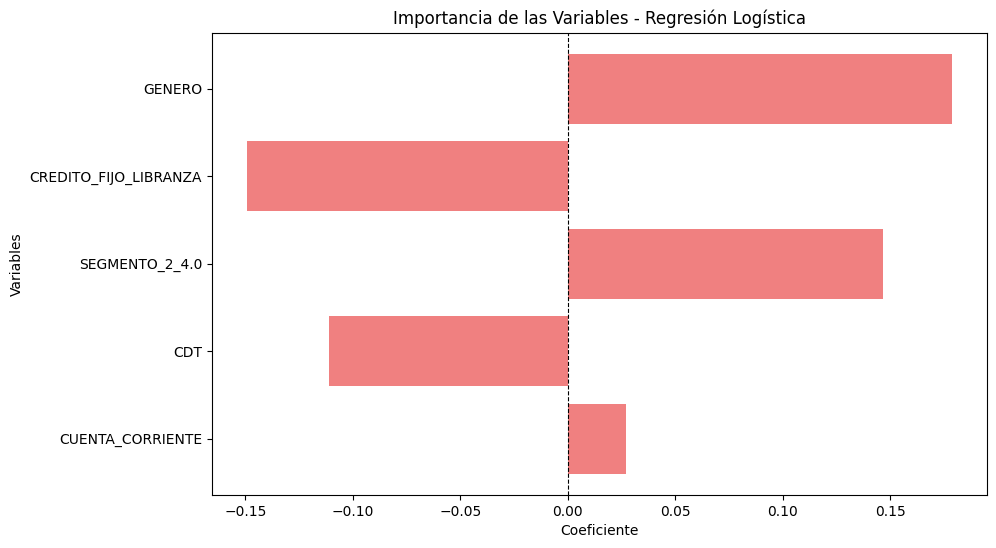

In [853]:

features = X_train_s.columns if isinstance(X_train_s, pd.DataFrame) else [f'Feature_{i}' for i in range(X_train_s.shape[1])]

# Importancia de las variables (coeficientes del modelo)
coefficients = log_reg_best_model.coef_[0]  # Coeficientes del modelo

importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)  # Ordenar por valor absoluto de coeficientes

# Mostrar el DataFrame de importancia
print("\n--- Importancia de las variables (Regresión Logística) ---")
print(importance_df)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='lightcoral')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea vertical en 0
plt.xlabel('Coeficiente')
plt.ylabel('Variables')
plt.title('Importancia de las Variables - Regresión Logística')
plt.gca().invert_yaxis()  # Para que la variable más importante esté arriba
plt.show()

In [854]:
# XGBoost
y_prob_xgb_test = xgb_best_model.predict_proba(X_test)[:, 1]
y_prob_xgb_train = xgb_best_model.predict_proba(X_train_s)[:, 1]

auc_xgb_test = roc_auc_score(y_test, y_prob_xgb_test)
auc_xgb_train = roc_auc_score(y_train_s, y_prob_xgb_train)


print("XGBoost - AUC en entrenamiento:", auc_xgb_train)
print("\n--- Clasificación en Entrenamiento ---")
print(classification_report(y_train_s, xgb_best_model.predict(X_train_s)))

print("\nXGBoost - AUC en prueba:", auc_xgb_test)
print("\n--- Clasificación en Prueba ---")
print(classification_report(y_test, xgb_best_model.predict(X_test)))

XGBoost - AUC en entrenamiento: 0.6598962494269394

--- Clasificación en Entrenamiento ---
              precision    recall  f1-score   support

           0       0.74      0.39      0.51      1438
           1       0.58      0.87      0.70      1438

    accuracy                           0.63      2876
   macro avg       0.66      0.63      0.60      2876
weighted avg       0.66      0.63      0.60      2876


XGBoost - AUC en prueba: 0.4712677550539282

--- Clasificación en Prueba ---
              precision    recall  f1-score   support

           0       0.85      0.30      0.45       361
           1       0.10      0.60      0.17        47

    accuracy                           0.34       408
   macro avg       0.48      0.45      0.31       408
weighted avg       0.77      0.34      0.42       408




--- Importancia de las variables (XGBoost) ---
                 Feature  Importance
2                 GENERO      1744.0
3         SEGMENTO_2_4.0      1491.0
4       CUENTA_CORRIENTE      1277.0
1  CREDITO_FIJO_LIBRANZA      1144.0
0                    CDT       936.0


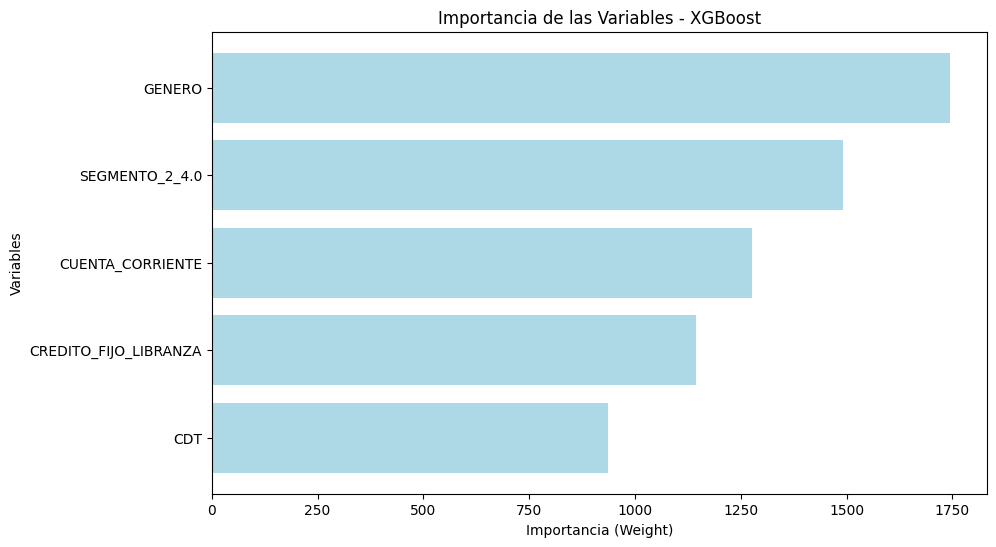

In [855]:
# Importancia de las variables
feature_importances = xgb_best_model.get_booster().get_score(importance_type='weight')
features = X_train_s.columns if isinstance(X_train_s, pd.DataFrame) else [f'Feature_{i}' for i in range(X_train_s.shape[1])]

# Crear un DataFrame de importancia
importance_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['Importance']).reset_index()
importance_df.columns = ['Feature', 'Importance']

# Si las características originales están disponibles, reemplace los nombres
importance_df['Feature'] = importance_df['Feature'].map(lambda x: features[int(x[1:])] if x[1:].isdigit() else x)

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame de importancia
print("\n--- Importancia de las variables (XGBoost) ---")
print(importance_df)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.xlabel('Importancia (Weight)')
plt.ylabel('Variables')
plt.title('Importancia de las Variables - XGBoost')
plt.gca().invert_yaxis()  # Para que la variable más importante esté arriba
plt.show()

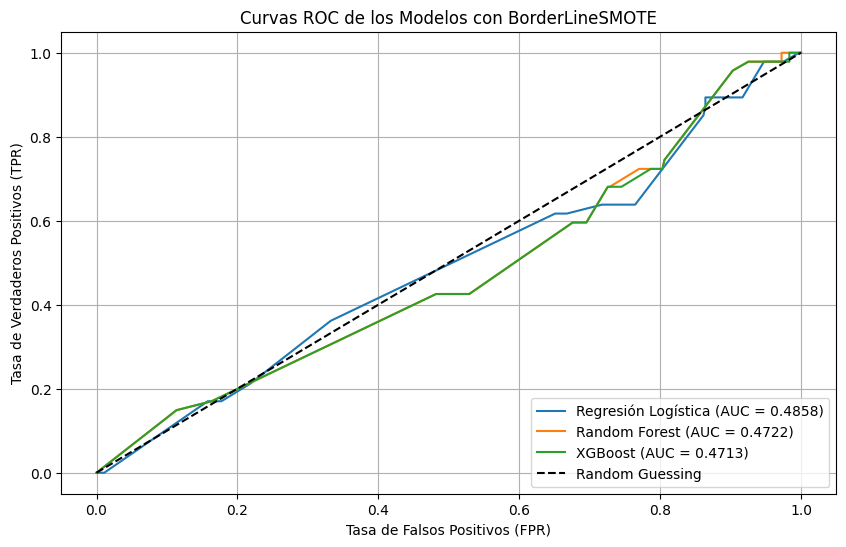

In [856]:
# Calcular la curva ROC y AUC para cada modelo
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log_test)


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf_test)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb_test)


# Gráfica de las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log_test:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf_test:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb_test :.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('Curvas ROC de los Modelos con BorderLineSMOTE')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

c:\Users\57320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Matriz de Confusión Regresión:
[[ 63 298]
 [ 15  32]]


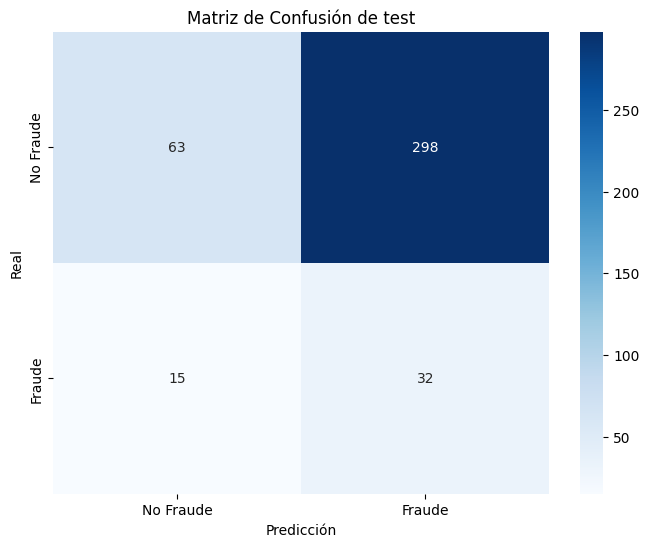

In [857]:
# Generar predicciones
#Regresión
y_pred_test_reg = log_reg_best_model.predict(X_test)

# Generar la matriz de confusión para el conjunto de test
matriz_confusion_test = confusion_matrix(y_test, y_pred_test_reg)
print("Matriz de Confusión Regresión:")
print(matriz_confusion_test)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de test')
plt.show()

Matriz de Confusión Random Forest:
[[110 251]
 [ 19  28]]


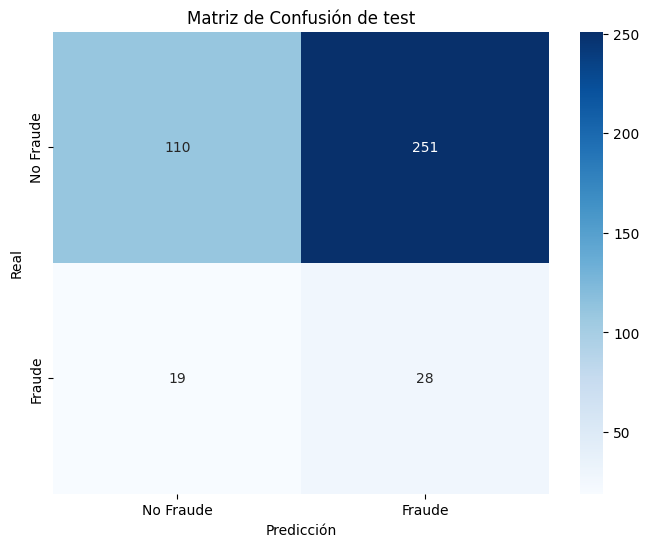

In [858]:
#RF
y_pred_test_rf = rf_best_model.predict(X_test)

matriz_confusion_test = confusion_matrix(y_test, y_pred_test_rf)
print("Matriz de Confusión Random Forest:")
print(matriz_confusion_test)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de test')
plt.show()


Matriz de Confusión XGBoost:
[[110 251]
 [ 19  28]]


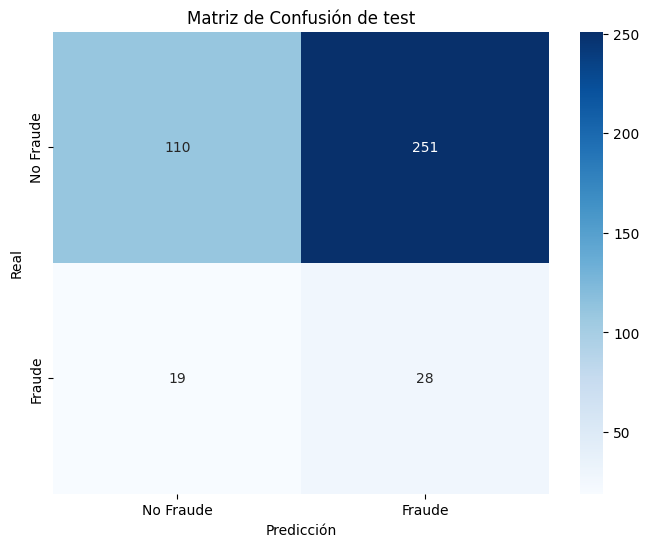

In [859]:
#XG
y_pred_test_xgb = xgb_best_model.predict(X_test)

matriz_confusion_test = confusion_matrix(y_test, y_pred_test_xgb)
print("Matriz de Confusión XGBoost:")
print(matriz_confusion_test)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de test')
plt.show()